In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/train_data.csv')

In [ ]:
dataset.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,0.0,1.0,2.0,1.0,0.0,1.0,0,4,6,487,2,0,0,-1.8,92.893,-46.2,1.313,5099.1,1
1,39,1.0,0.0,3.0,1.0,1.0,1.0,1,4,6,346,4,0,0,1.1,93.994,-36.4,4.855,5191.0,1
2,25,1.0,1.0,3.0,1.0,0.0,1.0,1,5,4,227,1,0,0,1.4,94.465,-41.8,4.962,5228.1,1
3,38,1.0,1.0,2.0,1.0,NaN,NaN,1,5,6,17,3,0,0,1.4,94.465,-41.8,4.959,5228.1,1
4,47,2.0,1.0,4.0,1.0,0.0,1.0,0,10,2,58,1,0,0,-0.1,93.200,-42.0,4.191,5195.8,1


In [ ]:
# x = dataset.loc[dataset['y'].isin([1])].sample(n=200)
# y = dataset.loc[dataset['y'].isin([0])]
# y.shape

In [ ]:
len(dataset.columns)

20

In [ ]:
dataset.isnull().sum()

age                 0
job                32
marital             9
education         138
default           596
housing            77
loan               77
contact             0
month               0
day_of_week         0
duration            0
campaign            0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

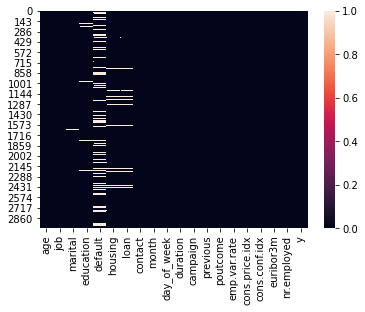

In [ ]:
sns.heatmap(dataset.isnull())

In [ ]:
dataset.dropna(inplace=True)


In [ ]:
x = dataset.loc[dataset['y'].isin([1])].sample(n=266)
y = dataset.loc[dataset['y'].isin([0])]

new_dataset = pd.concat([x, y])
new_dataset.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2168,34,0.0,1.0,1.0,1.0,0.0,1.0,0,4,3,137,1,0,0,-1.8,92.893,-46.2,1.291,5099.1,1
784,47,0.0,1.0,2.0,1.0,0.0,0.0,0,4,4,74,6,2,2,-1.8,92.893,-46.2,1.334,5099.1,1
2130,27,2.0,0.0,4.0,1.0,0.0,1.0,0,3,6,401,1,1,2,-1.8,93.075,-47.1,1.405,5099.1,1
1503,47,5.0,2.0,3.0,1.0,0.0,1.0,0,6,5,303,3,0,0,1.4,93.918,-42.7,4.962,5228.1,1
1035,46,1.0,1.0,3.0,1.0,1.0,1.0,0,4,4,174,3,0,0,-1.8,92.893,-46.2,1.334,5099.1,1


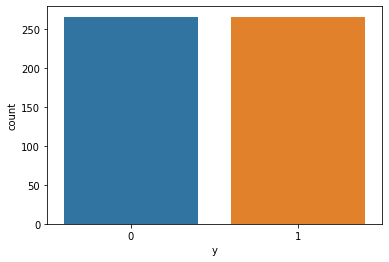

In [ ]:
sns.countplot(x=new_dataset['y'], data=new_dataset)

In [ ]:
from sklearn.utils import shuffle
dataset = shuffle(new_dataset)

X= new_dataset.iloc[:,[9,10,11,12,13,14,15,16,18]]
y= new_dataset.iloc[:,19]

In [ ]:
X.head()

,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
2168,3,137,1,0,0,-1.8,92.893,-46.2,5099.1
784,4,74,6,2,2,-1.8,92.893,-46.2,5099.1
2130,6,401,1,1,2,-1.8,93.075,-47.1,5099.1
1503,5,303,3,0,0,1.4,93.918,-42.7,5228.1
1035,4,174,3,0,0,-1.8,92.893,-46.2,5099.1


In [ ]:
X.shape

(532, 9)

In [ ]:
y.head(5)

2168    1
784     1
2130    1
1503    1
1035    1
Name: y, dtype: int64

In [ ]:
# standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.68578745, -0.65092593, -0.5161049 , ..., -0.90901288,
        -1.0968012 , -0.32226539],
       [ 0.04243395, -0.81869302,  1.50873144, ..., -0.90901288,
        -1.0968012 , -0.32226539],
       [ 1.49887676,  0.0520981 , -0.5161049 , ..., -0.62188751,
        -1.26355204, -0.32226539],
       ...,
       [-1.41400885,  1.02674505,  0.29382963, ...,  1.78554831,
        -1.70822094, -1.81915465],
       [ 1.49887676,  0.77908886,  0.29382963, ...,  0.70803936,
        -0.44832572,  1.10281737],
       [ 0.77065535,  1.96411042, -0.5161049 , ...,  0.82793786,
         0.71893015,  0.69296799]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

(372, 9)

In [ ]:
# y_train = pd.get_dummies(y_train)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=9, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_split=0.33, verbose=0, batch_size=10, epochs=30) 

In [ ]:
y_test

2966    0
2138    0
2431    0
1256    1
2154    1
       ..
19      0
2057    1
1299    1
1024    1
1846    0
Name: y, Length: 160, dtype: int64

In [ ]:
# y_test = pd.get_dummies(y_test)
# y_test

In [ ]:
eval_model=model.evaluate(X_test, y_test)
eval_model

160/160 [==============================] - 0s 37us/step


[0.43993557095527647, 0.8187500238418579]

In [ ]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[59 11]
 [18 72]]


In [ ]:
# x_new = dataset.loc[dataset['y'].isin([1])].sample(n=10)
# y_new = dataset.loc[dataset['y'].isin([0])].sample(n=10)

In [ ]:
# y_new

In [ ]:
# x_one_test = x_new.iloc[:,0:19]
# y_one_test = x_new.iloc[:,19]

In [ ]:
# x_one_test

In [ ]:
# x_one_test = sc.fit_transform(x_one_test)
# x_one_test

In [ ]:
# model.predict(x_one_test)

In [ ]:
# x_zero_test = y_new.iloc[:,0:19]
# y_zero_test = y_new.iloc[:,19]

# model.predict(x_zero_test)

In [ ]:
# y_zero_test = pd.get_dummies(y_zero_test)
# model.evaluate(x_zero_test, y_zero_test)

In [ ]:
# y_zero_test = pd.get_dummies(y_one_test)
# model.evaluate(x_one_test, y_one_test)

In [ ]:
import matplotlib.pyplot as plt
# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['loss']
# plt.plot(loss_values, label='Training loss')
# plt.plot(val_loss_values, label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
# plt.clf()

# acc_values = history_dict['acc']
# val_acc_values = history_dict['acc']
# plt.plot(acc_values, label='Training acc')
# plt.plot(val_acc_values, label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

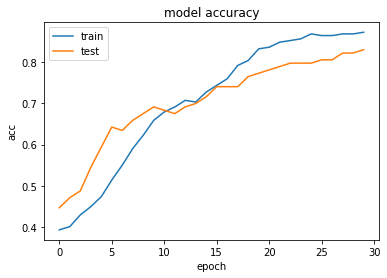

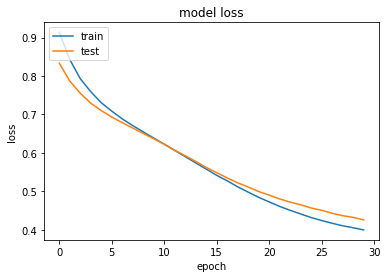

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

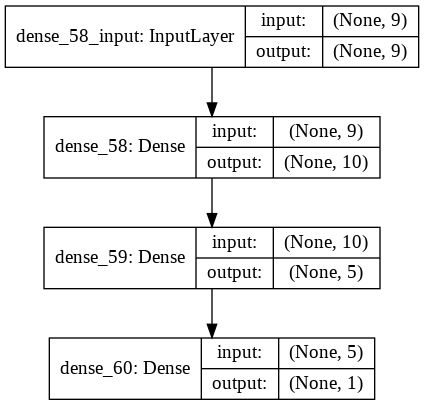

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='plot_15.png', show_shapes=True, show_layer_names=True)